In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import linregress
import seaborn as sns
import matplotlib.font_manager as fm

# Compare Resultant Models

In [40]:
# import evaluation.csvs 
experiment_list = ['split_individual_flight', 'crop', 'crop_zoomout', 'crop_altitude', 'crop_center']
experiment_rename_map = {'split_individual_flight': 'baseline', 'crop': 'sharkcrop_medium',
    'crop_zoomout': 'sharkcrop_large', 'crop_altitude': 'sharkcrop_altitude', 'crop_center': 'centered_sharkcrop_altitude'}
experiment_list_renamed = ['baseline', 'sharkcrop_medium', 'sharkcrop_large', 'sharkcrop_altitude', 'centered_sharkcrop_altitude']

dfs = [
    pd.read_csv(f'/home/Alexandra/Projects/bodycondition/sharkbody_seg/runs/unet_smp/{experiment}/eval/evaluation.csv')
    .assign(experiment=experiment_rename_map.get(experiment, experiment)) for experiment in experiment_list if pd.io.common.file_exists(f'/home/Alexandra/Projects/bodycondition/sharkbody_seg/runs/unet_smp/{experiment}/eval/evaluation.csv')
]

df = pd.concat(dfs, ignore_index=True)

In [37]:
# compute r2 and compare for tl measures
df_tl_metrics = pd.concat([
    pd.DataFrame({
        'experiment': [experiment],
        'r2': [r2_score(valid_data['TL_pixels_skeleton_transf'], valid_data['TL_Pixels'])],
        'slope': [linregress(valid_data['TL_Pixels'], valid_data['TL_pixels_skeleton_transf']).slope],
        'intercept': [linregress(valid_data['TL_Pixels'], valid_data['TL_pixels_skeleton_transf']).intercept],
        'n': [len(valid_data)]  # Add number of valid samples used in the computation

    })
    for experiment, experiment_data in df.groupby('experiment')
    # Drop rows where either 'TL_Pixels' or 'TL_pixels_skeleton_transf' is NaN
    if len((valid_data := experiment_data.dropna(subset=['TL_Pixels', 'TL_pixels_skeleton_transf']))) > 1
], ignore_index=True)

# Display the resulting metrics DataFrame
print(df_tl_metrics)


                    experiment        r2     slope  intercept    n
0                     baseline  0.512057  0.886437  29.736442  100
1  centered_sharkcrop_altitude  0.810882  0.858799   4.602742  100
2           sharkcrop_altitude  0.741890  0.823007  12.324076  100
3              sharkcrop_large  0.784846  0.866260   2.469927  100
4             sharkcrop_medium  0.337202  0.675785  46.623780  100


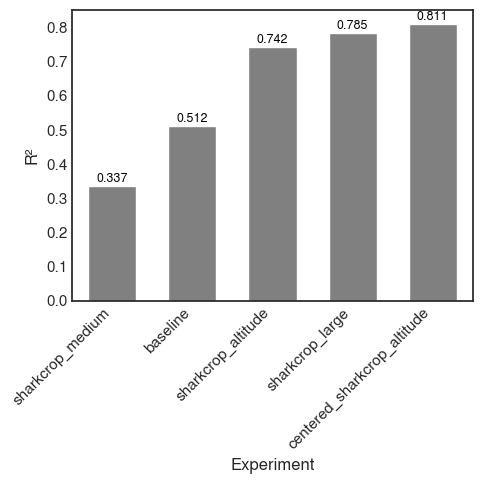

In [38]:
df_tl_metrics_sorted = df_tl_metrics.sort_values(by='r2', ascending=True)

sns.set(style="white", palette="gray")
plt.rcParams["font.family"] = "Nimbus Sans"
plt.figure(figsize=(5, 5))
sns.barplot(x='experiment', y='r2', data=df_tl_metrics_sorted, color='gray', width=0.6) # bar plot

for p in plt.gca().patches: # labels, title
    plt.gca().annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=9, color='black', 
                       xytext=(0, 5), textcoords='offset points')
plt.xlabel('Experiment', fontsize=12)
plt.ylabel('R²', fontsize=12)

plt.xticks(rotation=45, ha='right') # rotate x axis
plt.tick_params(axis='both', which='both', length=5, direction='in', width=1)

# Display the plot
plt.tight_layout()
plt.show()


# Plotting

In [65]:
def plot_scatterplot_metric_groundtruth(df, maskmetric, groundtruthmetric, experiment_list_renamed):
    """Plots scatterplots for multiple experiments."""
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))  # Adjust size as needed
    axes = axes.flatten()

    x_min, x_max = df[groundtruthmetric].min(), df[groundtruthmetric].max()
    y_min, y_max = df[maskmetric].min(), df[maskmetric].max()

    for idx, experiment in enumerate(experiment_list_renamed):
        filtered_df = df[df['experiment'] == experiment]
        sns.scatterplot(x=groundtruthmetric, y=maskmetric, data=filtered_df, ax=axes[idx], alpha=0.7, color='b')
        
        axes[idx].set_xlabel(groundtruthmetric, fontsize=10)
        axes[idx].set_ylabel(maskmetric, fontsize=10)
        axes[idx].set_title(f'{experiment}', fontsize=12)
        
        axes[idx].plot([filtered_df[groundtruthmetric].min(), filtered_df[groundtruthmetric].max()], 
                       [filtered_df[groundtruthmetric].min(), filtered_df[groundtruthmetric].max()], 
                       'k--', label='y=x')  # The identity line
        axes[idx].set_xlim(x_min, x_max)
        axes[idx].set_ylim(y_min, y_max)
        axes[idx].legend()
    plt.tight_layout()

    plt.show()

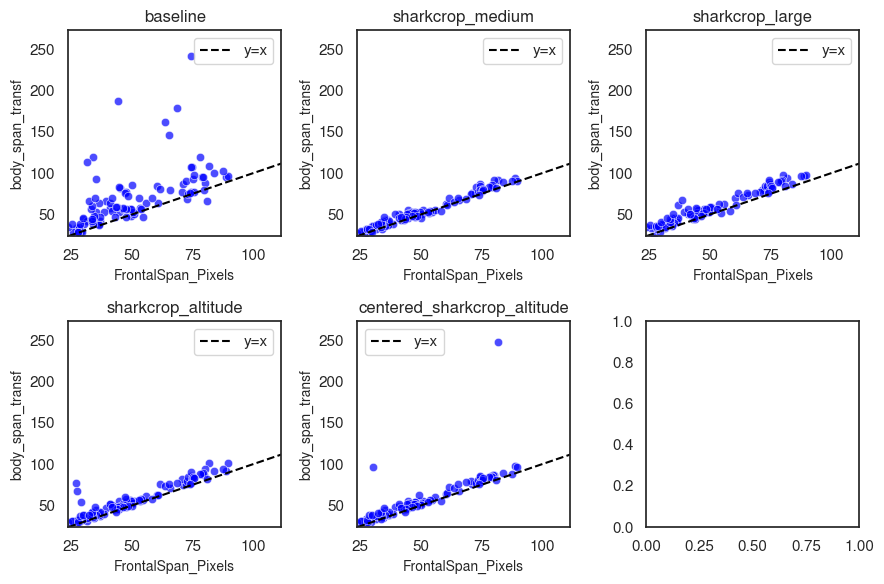

In [64]:
plot_scatterplot_metric_groundtruth(df, 'body_span_transf', 'FrontalSpan_Pixels', experiment_list_renamed)

In [13]:
# compute r2 and compare for body span measures
df_bs_metrics = pd.concat([
    pd.DataFrame({
        'experiment': [experiment],
        'r2': [r2_score(valid_data['body_span_transf'], valid_data['FrontalSpan_Pixels'])],
        'slope': [linregress(valid_data['FrontalSpan_Pixels'], valid_data['body_span_transf']).slope],
        'intercept': [linregress(valid_data['FrontalSpan_Pixels'], valid_data['body_span_transf']).intercept],
        'n': [len(valid_data)]  # Add number of valid samples used in the computation

    })
    for experiment, experiment_data in df.groupby('experiment')
    # Drop rows where either 'TL_Pixels' or 'TL_pixels_skeleton_transf' is NaN
    if len((valid_data := experiment_data.dropna(subset=['FrontalSpan_Pixels', 'body_span_transf']))) > 1
], ignore_index=True)

# Display the resulting metrics DataFrame
print(df_bs_metrics)

                    experiment        r2     slope  intercept    n
0                     baseline  0.146417  1.152110  12.604991  100
1  centered_sharkcrop_altitude  0.591948  1.087210   2.760989  100
2           sharkcrop_altitude  0.813556  0.985617   7.541158  100
3              sharkcrop_large  0.835793  1.004129   7.486134  100
4             sharkcrop_medium  0.943210  0.979905   4.547848  100
